In [23]:
from random import Random
SEED=5
def generate_pnts(N=1):
  random_gen=Random(SEED)
  lst_x,lst_y=[],[]
  for _ in range (N):
    lst_x.append(random_gen.uniform(0,1.))
  for _ in range (N):
    lst_y.append(random_gen.uniform(0,1.))
  return lst_x,lst_y
data_x, data_y = generate_pnts(N = 1)

In [24]:
from node import Node
x_p, y_p = Node(val = 0.3), Node(val = 0.3)
def loss_graph(x_p, y_p, data_x, data_y):
    loss = 0
    for xi, yi in zip(data_x,data_y):
        loss += ((x_p - xi)**2 + (y_p - yi)**2)**0.5
    return (1/len(data_x))*loss 
loss = loss_graph(x_p, y_p, data_x, data_y)
loss.backward()
print(f"loss: {loss.val}, grad: {[x_p.grad,y_p.grad]}")

loss: 0.5472122517293468, grad: [-0.5900849147094943, -0.8073411877467226]


In [25]:
loss.zero_grad()
print(f"loss after zeroing: {loss.val}, grad: {[x_p.grad,y_p.grad]}")

loss after zeroing: 0.5472122517293468, grad: [0, 0]


In [26]:
import torch
data=torch.tensor([data_x,data_y])
data=data.t()
pnt=torch.tensor([0.3,0.3])
pnt.requires_grad=True
pnt.retain_grad()
torch_loss=torch.mean(torch.sqrt(((pnt-data)**2).sum(dim=1)))
torch_loss.backward()
print(f"loss: {torch_loss}, torch_grad: {pnt.grad.data.tolist()}")

loss: 0.5472122430801392, torch_grad: [-0.5900848507881165, -0.8073412179946899]


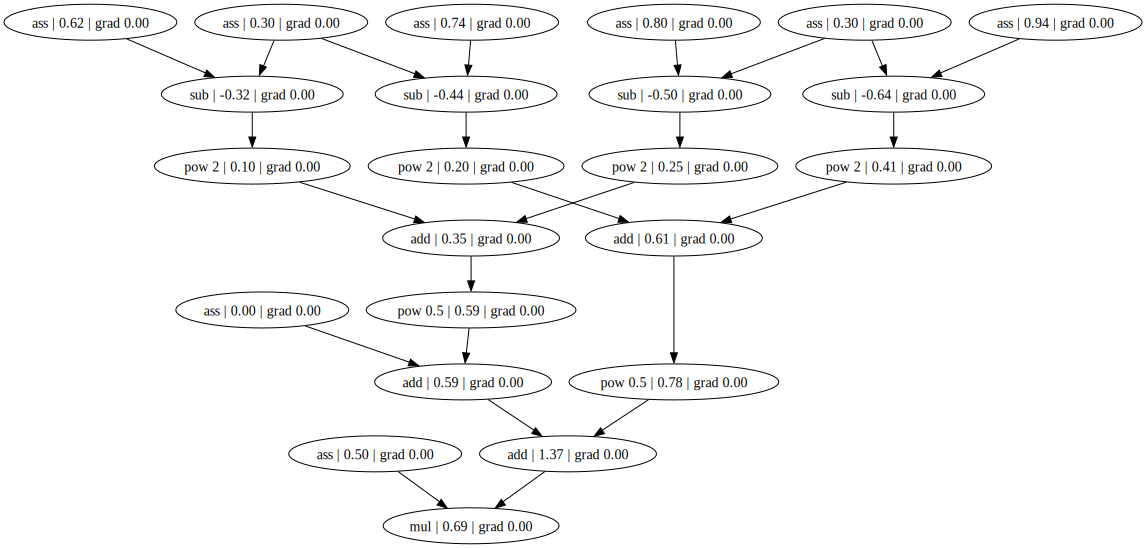

In [5]:
loss.draw_graph()

In [21]:
EPOCHS = 300
LR = 0.01
loss_progress = []
data_x, data_y = generate_pnts(N = 500)
x_p, y_p = Node(val = 0.3), Node(val = 0.3)
for _ in range (EPOCHS):
    loss = loss_graph(x_p, y_p, data_x, data_y)
    loss.backward()
    loss_progress.append(loss.val)
    x_p -= LR * x_p.grad
    y_p -= LR * y_p.grad
    loss.zero_grad()

X: 0.49363759905796584, Y: 0.48367727104578584


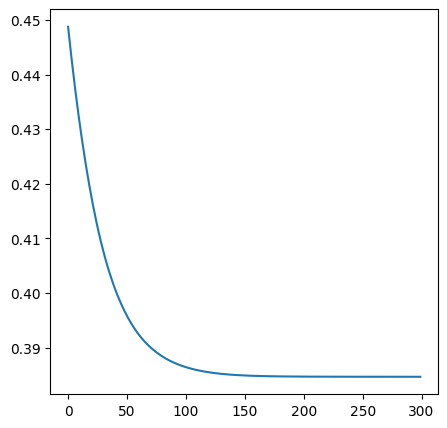

In [22]:
from matplotlib.pyplot import figure
fig = figure(figsize=(5,5))
ax = fig.add_subplot(1,1,1)
ax.plot(loss_progress);
print(f"X: {x_p.val}, Y: {y_p.val}")